# Housing Price with Ames Dataset new insights, top 1%
This competition is very important to me as it is my first competition on Kaggle.
I read some awesome notebooks and spent some days trying to get the best score I can reach as this is my first experience with machine learning



If you use parts of this notebook in your scripts/notebooks, giving some kind of credit would be very much appreciated :) You can for instance link back to this notebook. Thanks!

# 1) Importing libraries

In [1]:
# Essentials
import numpy as np
import scipy
import pandas as pd
import datetime
import random
from scipy import stats

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.stats import kstest
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from scipy.stats import yeojohnson
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
import category_encoders as ce

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

# Loading data

In [2]:
Ames = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
Train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
Test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Check features names (to make sure there is no inconsistency)

In [3]:
cols_dic = dict(Ames_cols= Ames.columns,
               Train_cols = Train.columns,
               Test_cols= Test.columns)
cols_df = pd.DataFrame.from_dict(cols_dic, orient='index').transpose()
cols_df

,Ames_cols,Train_cols,Test_cols
0,Order,Id,Id
1,PID,MSSubClass,MSSubClass
2,MS SubClass,MSZoning,MSZoning
3,MS Zoning,LotFrontage,LotFrontage
4,Lot Frontage,LotArea,LotArea
5,Lot Area,Street,Street
6,Street,Alley,Alley
7,Alley,LotShape,LotShape
8,Lot Shape,LandContour,LandContour
9,Land Contour,Utilities,Utilities


### Names of features in both Train and Test are the same but in Ames there are some differences

In [4]:
Ames = Ames.drop(['Order', 'PID'], axis = 1)
Train = Train.drop('Id', axis = 1)

In [5]:
cols_dic = dict(zip(Ames.columns, Train.columns))

In [6]:
Ames = Ames.rename(columns=cols_dic)

In [7]:
df_train = pd.concat([Train, Ames])

### Drop duplications and resetting index

In [8]:
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index().drop('index', axis = 1)
df_train['Id'] = range(len(df_train))
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,3
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4


In [9]:
df_test = Test.copy()

# Target variable overview
- Check if it is normally distributed.

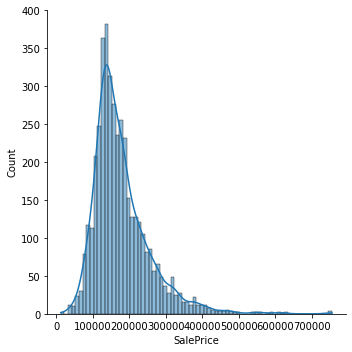

In [10]:
sns.displot(df_train['SalePrice'], kde = True)

In [11]:
df_train['SalePrice'] = df_train['SalePrice'].apply(np.log)

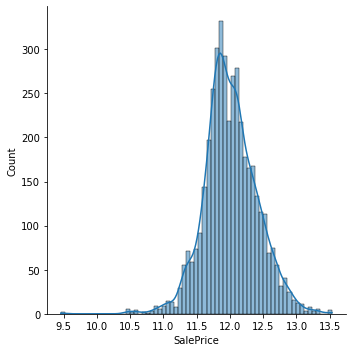

In [12]:
sns.displot(df_train['SalePrice'], kde = True)

In [13]:
all_data = pd.concat([df_train.drop('SalePrice', axis = 1), df_test])

# Missing data overview
- Take in consideration the following points
    - In some datasets there is zero to imply this value is missing, especially in numerical features (instead of np.nan)
    - Missing data can be presented as the word "None" (instead of np.nan)

In [14]:
def miss_data(data):
    Miss_df = ((data == 0).sum()).to_frame()
    Miss_df = Miss_df.rename(columns = {0: 'zeros'})
    Miss_df.index.name = 'Feature'
    Miss_df['np.nan'] = (data.isnull()).sum()
    Miss_df['None'] = (data == "None").sum()
    Miss_df['total'] = Miss_df['zeros'] + Miss_df['np.nan'] + Miss_df['None']
    Miss_df['Percent'] = 100*Miss_df['total']/len(data)
    Miss_df['Type'] = [data[i].dtype for i in Miss_df.index ]
    return    Miss_df.sort_values(ascending = False, by = 'Percent')

In [15]:
### Missing data in all_data
miss_data(data = all_data)

,zeros,np.nan,None,total,Percent,Type
Feature,,,,,,
PoolQC,0,5634,0,5634,99.611033,object
PoolArea,5631,0,0,5631,99.557992,int64
3SsnPorch,5587,0,0,5587,98.780057,int64
LowQualFinSF,5577,0,0,5577,98.603253,int64
MiscVal,5454,0,0,5454,96.428571,int64
MiscFeature,0,5450,0,5450,96.357850,object
BsmtHalfBath,5309,4,0,5313,93.935644,float64
Alley,0,5272,0,5272,93.210750,object
ScreenPorch,5156,0,0,5156,91.159830,int64


## By simple analysis of the previous dataframe we should do:
- Mean imputation for: 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea' (In df_train and df_test separately)
- Most frequent imputation for: 'MasVnrType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType', 'KitchenQual' (In df_train and df_test separately)
- Create new features to be used instead of the original ones that have a lot of zeros
    - 'Porch' = 'OpenPorchSF' + 'EnclosedPorch' + '3SsnPorch' + 'ScreenPorch'
    - 'Bath_total' = 'FullBath' + 0.5'HalfBath' + 'BsmtFullBath' + 0.5'BsmtHalfBath'
    - 'BsmtFinSF' = 'BsmtFinSF1' + 'BsmtFinSF2' - 'BsmtUnfSF'
    - 'FinSF' = '1stFlrSF' + '2ndFlrSF' - 'LowQualFinSF'
- Drop useless features:
    - 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'FullBath', 'HalfBath' , 'BsmtFullBath' ,'BsmtHalfBath',
       'BsmtFinSF1' , 'BsmtFinSF2' , 'BsmtUnfSF', 
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'
- Some features have high percentage of missing values (or zeros) that should be dropped
    - 'PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'WoodDeckSF', 'FireplaceQu', 'Fireplaces', 'MasVnrType', 'MasVnrArea'
- some features have np.nan values, but it sould be replaced by "None"
    - 'BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQu', 'GarageCond'
- Other zeros have reasons to be zero
- np.nan values to be zeros: 
    - GarageYrBlt should be zeros (but this feature sould be converted to categorical later)
    - GarageArea, GarageCars
- np.nan values in 'MasVnrArea' should be zeros
- 'LotFrontage' to be imputed using a regression model (In df_train and df_test separately)

In [16]:
cat_feat = ['GarageFinish', 'GarageQual', 'GarageCond', 'MSZoning',
                  'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType', 'KitchenQual']
num_feat = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2',
                  'BsmtFinSF1']

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
cat_imputer_train = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_train.loc[:,cat_feat] = cat_imputer_train.fit_transform(df_train.loc[:, cat_feat])
num_imputer_train = SimpleImputer(missing_values= np.nan, strategy = 'mean')
df_train.loc[:, num_feat] = num_imputer_train.fit_transform(df_train.loc[:, num_feat])

In [19]:
cat_imputer_test = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_test.loc[:,cat_feat] = cat_imputer_test.fit_transform(df_test.loc[:, cat_feat])
num_imputer_test = SimpleImputer(missing_values= np.nan, strategy = 'mean')
df_test.loc[:, num_feat] = num_imputer_test.fit_transform(df_test.loc[:, num_feat])

In [20]:
df_train['Bath_total'] = df_train['FullBath'] + 0.5*df_train['HalfBath'] + df_train['BsmtFullBath'] + 0.5*df_train['BsmtHalfBath']
df_test['Bath_total'] = df_test['FullBath'] + 0.5*df_test['HalfBath'] + df_test['BsmtFullBath'] + 0.5*df_test['BsmtHalfBath']

In [21]:
df_train['BsmtFinSF'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] - df_train['BsmtUnfSF']
df_test['BsmtFinSF'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] - df_test['BsmtUnfSF']

In [22]:
df_train['Porch'] = df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_test['Porch'] = df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']

In [23]:
df_train['FinSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] - df_train['LowQualFinSF']
df_test['FinSF'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] - df_test['LowQualFinSF']

In [24]:
cols_to_drop = ['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'WoodDeckSF',
            'FireplaceQu', 'Fireplaces', 'MasVnrType', 'MasVnrArea',
            'FullBath', 'HalfBath' , 'BsmtFullBath' ,'BsmtHalfBath',
            'BsmtFinSF1' , 'BsmtFinSF2' , 'BsmtUnfSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']

In [25]:
df_train = df_train.drop(cols_to_drop, axis = 1)
df_test = df_test.drop(cols_to_drop, axis = 1)

In [26]:
Cols_to_None = ['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 
                        'GarageFinish', 'GarageQual', 'GarageCond']

In [27]:
df_train[Cols_to_None] = df_train.loc[:,Cols_to_None].replace(to_replace = np.nan, value = "None", inplace = False)
df_test[Cols_to_None] = df_test.loc[:,Cols_to_None].replace(to_replace = np.nan, value = "None", inplace = False)

In [28]:
cols_to_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars']
df_train[cols_to_zero] = df_train[cols_to_zero].fillna(0)
df_test[cols_to_zero] = df_test[cols_to_zero].fillna(0)

In [29]:
df_train_totrain = df_train[df_train['LotFrontage'].isnull() == False]
df_train_totest = df_train[df_train['LotFrontage'].isnull() == True]
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators = 5000, learning_rate = 0.01)
reg.fit(df_train_totrain.select_dtypes(exclude = 'object').drop(['LotFrontage', 'SalePrice', 'Id'], axis = 1), 
        df_train_totrain['LotFrontage'], verbose = False)
df_train_totest['LotFrontage'] = reg.predict(df_train_totest.select_dtypes(exclude = 'object').drop(['LotFrontage', 'SalePrice', 'Id'], axis = 1))
df_train = pd.concat([df_train_totrain, df_train_totest])

In [30]:
df_test_totrain = df_test[df_test['LotFrontage'].isnull() == False]
df_test_totest = df_test[df_test['LotFrontage'].isnull() == True]
from xgboost import XGBRegressor
reg_test = XGBRegressor(n_estimators = 5000, learning_rate = 0.01)
reg_test.fit(df_test_totrain.select_dtypes(exclude = 'object').drop(['LotFrontage', 'Id'], axis = 1), df_test_totrain['LotFrontage'], 
        verbose = False)
df_test_totest['LotFrontage'] = reg_test.predict(df_test_totest.select_dtypes(exclude = 'object').drop(['LotFrontage', 'Id'], axis = 1))
df_test = pd.concat([df_test_totrain, df_test_totest])

In [31]:
df_train = df_train.sort_values('Id', ascending = True)
df_test = df_test.sort_values('Id', ascending = True)

In [32]:
### Missing data in traing dataset
miss_data(data = df_train)

,zeros,np.nan,None,total,Percent,Type
Feature,,,,,,
Porch,1295,0,0,1295,30.855373,int64
GarageYrBlt,232,0,0,232,5.527758,float64
GarageArea,230,0,0,230,5.480105,float64
GarageType,0,0,230,230,5.480105,object
GarageCars,230,0,0,230,5.480105,float64
BsmtFinSF,147,0,0,147,3.502502,float64
BsmtExposure,0,0,119,119,2.835359,object
BsmtFinType2,0,0,117,117,2.787706,object
BsmtFinType1,0,0,115,115,2.740052,object


In [33]:
### Missing data in testing dataset
miss_data(data = df_test)

,zeros,np.nan,None,total,Percent,Type
Feature,,,,,,
Porch,415,0,0,415,28.444140,int64
GarageYrBlt,78,0,0,78,5.346127,float64
GarageArea,76,0,0,76,5.209047,float64
GarageType,0,0,76,76,5.209047,object
GarageCars,76,0,0,76,5.209047,float64
BsmtFinSF,52,0,0,52,3.564085,float64
BsmtCond,0,0,45,45,3.084304,object
BsmtQual,0,0,44,44,3.015764,object
BsmtExposure,0,0,44,44,3.015764,object


# Dealing with categorical features
- Date features should be converted to be categorical, but first:
        - There are many years present in df_train and not present in df_test and vice versa
        - To convert date features to categorical that will lead to a large number of categories. So, we will collect year features to be every five years as follows.
- A categorical feature in train dataset may have unique categories that not in the test dataset or vice versa, so, we should compare unique categories first in both train and test datasets

In [34]:
date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
df_train[date_cols] = round(df_train[date_cols]/5)*5
df_test[date_cols] = round(df_test[date_cols]/5)*5

# Check if there is any category in train dataset and not in test dataset or vice virsa

In [35]:
def compare_cols(cols):
    s=1
    for i in cols:
        print(f"feature is: {i}")
        train_unique_count = len(df_train[i].unique())
        test_unique_count = len(df_test[i].unique())
        print(f"# of train unique values is: {train_unique_count}")
        print(f"# of test unique values is: {test_unique_count}")
        all_values = set(df_train[i]).union(set(df_test[i]))
        D = pd.DataFrame({'Unique': list(all_values)})
        D['train_count'] = [len(df_train[df_train[i] == j]) for j in all_values]
        D['train_percent'] = (D['train_count']/ len(df_train)) * 100
        D['test_count'] = [len(df_test[df_test[i] == j]) for j in all_values]
        D['test_percent'] = (D['test_count']/ len(df_test)) * 100
        print(D.sort_values('train_count', ascending = False))
        print('--------------------')
        print(f"Total number of navigated features is: {s}")
        s+=1
        print('--------------------') 

In [36]:
compare_cols(cols = date_cols)

feature is: YearBuilt
# of train unique values is: 29
# of test unique values is: 26
    Unique  train_count  train_percent  test_count  test_percent
19  2005.0          759      18.084346         297     20.356408
17  2000.0          343       8.172504         111      7.607951
10  1970.0          291       6.933524          89      6.100069
8   1960.0          285       6.790565          97      6.648389
11  1975.0          268       6.385513          86      5.894448
9   1965.0          264       6.290207          89      6.100069
15  1995.0          258       6.147248          93      6.374229
7   1955.0          257       6.123421          89      6.100069
6   1950.0          171       4.074339          62      4.249486
12  1980.0          151       3.597808          53      3.632625
0   1920.0          147       3.502502          45      3.084304
4   1940.0          142       3.383369          51      3.495545
1   1925.0          136       3.240410          53      3.632625
14  1

In [37]:
df_train['YearBuilt'] = df_train['YearBuilt'].replace({1885.0:1890.0, 1870.0:1880.0, 1875.0:1880.0})
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].replace(to_replace= 1905.0, value= 1910.0, inplace = False)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].replace(to_replace= 2205.0, value= 2005.0, inplace = False)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].replace(to_replace= 2205.0, value= 2005.0, inplace = False)

In [38]:
# Recheck that every thing is Ok
compare_cols(cols = date_cols)

feature is: YearBuilt
# of train unique values is: 26
# of test unique values is: 26
    Unique  train_count  train_percent  test_count  test_percent
17  2005.0          759      18.084346         297     20.356408
16  2000.0          343       8.172504         111      7.607951
10  1970.0          291       6.933524          89      6.100069
8   1960.0          285       6.790565          97      6.648389
11  1975.0          268       6.385513          86      5.894448
9   1965.0          264       6.290207          89      6.100069
15  1995.0          258       6.147248          93      6.374229
7   1955.0          257       6.123421          89      6.100069
6   1950.0          171       4.074339          62      4.249486
12  1980.0          151       3.597808          53      3.632625
0   1920.0          147       3.502502          45      3.084304
4   1940.0          142       3.383369          51      3.495545
1   1925.0          136       3.240410          53      3.632625
14  1

In [39]:
# Some features were found to be categorical to be more meaningful
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)#Convert 'MSSubClass' feature to categorical instead of numerical
df_train['YearBuilt'] = df_train['YearBuilt'].astype(str)
df_train['YearRemodAdd'] = df_train['YearRemodAdd'].astype(str)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

df_test['MSSubClass'] = df_test['MSSubClass'].astype(str)#Convert 'MSSubClass' feature to categorical instead of numerical
df_test['YearBuilt'] = df_test['YearBuilt'].astype(str)
df_test['YearRemodAdd'] = df_test['YearRemodAdd'].astype(str)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].astype(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

In [40]:
# Review categorical features 
compare_cols(cols = df_train.select_dtypes(include= 'object').columns)

feature is: MSSubClass
# of train unique values is: 16
# of test unique values is: 16
   Unique  train_count  train_percent  test_count  test_percent
13     20         1524      36.311651         543     37.217272
15     60          828      19.728377         276     18.917066
3      50          422      10.054801         143      9.801234
7     120          259       6.171075          95      6.511309
2      30          204       4.860615          70      4.797807
1     160          186       4.431737          65      4.455106
12     70          185       4.407910          68      4.660727
4      80          174       4.145818          60      4.112406
8      90          156       3.716941          57      3.906785
0     190           87       2.072909          31      2.124743
6      85           67       1.596378          28      1.919123
9      75           38       0.905409           7      0.479781
14     45           30       0.714796           6      0.411241
5     180         

In [41]:
for i in df_train.select_dtypes(include= 'object').columns:
    Max = max([len(df_train[df_train[i] == j]) for j in df_train[i].unique()])
    Percent = round(100*Max/len(df_train))
    if Percent >= 90:
        print(i)
    else:
        pass

Street
LandContour
Utilities
LandSlope
Condition2
RoofMatl
BsmtCond
Heating
CentralAir
Electrical
Functional
GarageQual
GarageCond
PavedDrive


### By simple analysis you can conclude that:
* MSZoning:-
        - Train: convert 'A (agr)' and 'I (all)' to 'C (all)'
* Neighborhood:-
        - Train: convert 'Greens', 'GrnHill' and 'Landmrk' to 'NAmes'
* Condition1 and Condition2
        - To be combined in a new feature 'Condition' and put all values that have count less than 4 in a new category 'other'
* HouseStyle:-
        - Train: convert category '2.5Fin' to '2.5Unf'
* Exterior1st:-
        - Train: convert categories 'Stone', 'PreCast', 'ImStucc' to 'BrkComm'
* Exterior2nd:-
        - Train: convert categories 'PreCast', and 'Other' to 'CBlock'
* BsmtQual:- 
        - Train: convert 'Po' to 'Fa'
* KitchenQual:-
        - Train: convert 'Po' to 'Fa'
* SaleType:-
        - Train: convert 'VWD' to 'Con'
        - Train: convert 'WD ' to 'WD'
-----------------------------------------
* Some featues could be deleted 
        - Street, Heating, PoolQC
-----------------------------------------
* Some features maybe better to be ordinal encoded
        - ExterQual:- 
                        Po : 1, Fa : 2, TA : 3, Gd : 4, Ex : 5
        - ExterCond:- 
                        Po : 1, Fa : 2, TA : 3, Gd : 4, Ex : 5
        - BsmtQual:- 
                        None : 0, Po : 1, Fa : 2, TA : 3, Gd : 4, Ex : 5
        - BsmtExposure:- 
                        None : 0, No : 1, Mn : 2, Av : 3, Gd : 4
        - BsmtFinType1:- 
                        None : 0, Unf : 1, LwQ : 2, Rec : 3, BLQ : 4, ALQ : 5, GLQ : 6
        - BsmtFinType2:-
                        None : 0, Unf : 1, LwQ : 2, Rec : 3, BLQ : 4, ALQ : 5, GLQ : 6
        - HeatingQC:- 
                        Po : 1, Fa : 2, TA : 3, Gd : 4, Ex : 5
        - KitchenQual:- 
                        Po : 1, Fa : 2, TA : 3, Gd : 4, Ex : 5
        - GarageFinish:- 
                        None : 0, Unf : 1, RFn : 2, Fin : 3
        - GarageQual:- 
                        None : 0, Po : 1, Fa : 2, TA : 3, Gd : 4, Ex : 5


* Drop any feature that have unique value more than 90%

Street, LandContour, Utilities, LandSlope, RoofMatl, BsmtCond, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, PavedDrive

In [42]:
cols_to_drop_2 = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'RoofMatl', 'BsmtCond',
                  'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 
                  'GarageCond', 'PavedDrive']

In [43]:
df_train = df_train.drop(cols_to_drop_2, axis = 1)
df_test = df_test.drop(cols_to_drop_2, axis = 1)

In [44]:
df_train['MSZoning'] = df_train['MSZoning'].replace(to_replace=['A (agr)', 'I (all)'], value = 'C (all)', inplace=False)

In [45]:
df_train['Neighborhood'] = df_train['Neighborhood'].replace(to_replace=['Greens', 'GrnHill','Landmrk'], value = 'NAmes', inplace=False)

In [46]:
df_train['Condition'] = df_train['Condition1'] + '_' + df_train['Condition2']
df_test['Condition'] = df_test['Condition1'] + '_' + df_test['Condition2']

In [47]:
df_train = df_train.drop(['Condition1', 'Condition2'], axis =1)
df_test = df_test.drop(['Condition1', 'Condition2'], axis =1)

In [48]:
condition_unique_vaues_totoal = set(df_train['Condition'].unique()).union(set(df_test['Condition'].unique()))
unique_count_train = len(df_train['Condition'].unique())
unique_count_test = len(df_test['Condition'].unique())
print(f"No. of train unique values is: {unique_count_train}")
print(f"No. of test unique values is: {unique_count_test}")
df_count = pd.DataFrame({'Unique': list(condition_unique_vaues_totoal)})
df_count['train_count'] = [len(df_train[df_train['Condition'] == j]) for j in condition_unique_vaues_totoal]
df_count['train_percent'] = (df_count['train_count']/len(df_train)) * 100
df_count['test_count'] = [len(df_test[df_test['Condition'] == j]) for j in condition_unique_vaues_totoal]
df_count['test_percent'] = (df_count['test_count']/len(df_test)) * 100
df_count.sort_values('train_count', ascending = False)

No. of train unique values is: 22
No. of test unique values is: 16


,Unique,train_count,train_percent,test_count,test_percent
6,Norm_Norm,3611,86.037646,1251,85.743660
10,Feedr_Norm,225,5.360972,79,5.414668
11,Artery_Norm,130,3.097451,44,3.015764
1,RRAn_Norm,58,1.381939,19,1.302262
13,PosN_Norm,51,1.215154,18,1.233722
0,RRAe_Norm,37,0.881582,17,1.165182
12,PosA_Norm,25,0.595664,9,0.616861
17,RRAn_Feedr,12,0.285919,4,0.274160
19,RRNn_Norm,10,0.238265,3,0.205620
3,RRNe_Norm,8,0.190612,4,0.274160


In [49]:
to_replace_train = [i for i in df_train['Condition'].unique() if df_train['Condition'].value_counts()[i] < 5]
to_replace_test = [i for i in df_test['Condition'].unique() if df_test['Condition'].value_counts()[i] < 5]
df_train['Condition'] = df_train['Condition'].replace(to_replace= to_replace_train, value = 'Other', inplace=False)
df_test['Condition'] = df_test['Condition'].replace(to_replace = to_replace_test, value = 'Other', inplace = False)
df_train['Condition'] = df_train['Condition'].replace(to_replace=['RRAn_Feedr', 'RRNn_Norm', 'RRNe_Norm', 'PosN_PosN', 'Feedr_Feedr']
                                                              , value = 'Other', inplace=False)

In [50]:
df_train['HouseStyle'] = df_train['HouseStyle'].replace(to_replace=['2.5Fin'], value = '2.5Unf', inplace=False)

In [51]:
df_train['Exterior1st'] = df_train['Exterior1st'].replace(to_replace=['Stone', 'PreCast', 'ImStucc'], value = 'BrkComm', inplace=False)

In [52]:
df_train['Exterior2nd'] = df_train['Exterior2nd'].replace(to_replace=['PreCast', 'Other'], value = 'CBlock', inplace=False)

In [53]:
df_train['BsmtQual'] = df_train['BsmtQual'].replace(to_replace=['Po'], value = 'Fa', inplace=False)

In [54]:
df_train['KitchenQual'] = df_train['KitchenQual'].replace(to_replace=['Po'], value = 'Fa', inplace=False)

In [55]:
df_train['SaleType'] = df_train['SaleType'].replace(to_replace=['VWD'], value = 'Con', inplace=False)
df_train['SaleType'] = df_train['SaleType'].replace(to_replace=['WD '], value = 'WD', inplace=False)

In [56]:
# Recheck categorical feature to ensure that every thing is okay
compare_cols(cols = df_train.select_dtypes(include= 'object').columns)

feature is: MSSubClass
# of train unique values is: 16
# of test unique values is: 16
   Unique  train_count  train_percent  test_count  test_percent
13     20         1524      36.311651         543     37.217272
15     60          828      19.728377         276     18.917066
3      50          422      10.054801         143      9.801234
7     120          259       6.171075          95      6.511309
2      30          204       4.860615          70      4.797807
1     160          186       4.431737          65      4.455106
12     70          185       4.407910          68      4.660727
4      80          174       4.145818          60      4.112406
8      90          156       3.716941          57      3.906785
0     190           87       2.072909          31      2.124743
6      85           67       1.596378          28      1.919123
9      75           38       0.905409           7      0.479781
14     45           30       0.714796           6      0.411241
5     180         

In [57]:
# Applying ordinal encodings
cols_OE = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC'
           , 'KitchenQual', 'GarageFinish']
dic = {'None':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'No': 1, 'Mn': 2, 'Av': 3, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4
       , 'ALQ': 5, 'GLQ': 6, 'RFn': 2, 'Fin': 3, 'N': 1, 'P': 2, 'Y': 3, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4,'Other':1}

In [58]:
df_train[cols_OE] = df_train[cols_OE].replace(dic, inplace = False)

df_test[cols_OE] = df_test[cols_OE].replace(dic, inplace = False)

# Apply categorical encoding on the remaining categorical features after ordinal encoding

In [59]:
import category_encoders as ce

cols_CE = df_train.select_dtypes(include= 'object').columns
cols_CE

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'GarageYrBlt',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Condition'],
      dtype='object')

In [60]:
cbe = ce.cat_boost.CatBoostEncoder(a = 1)
cbe.fit(df_train[cols_CE], df_train['SalePrice'])
df_train[cols_CE] = cbe.transform(df_train[cols_CE])
df_test[cols_CE] = cbe.transform(df_test[cols_CE])

In [61]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id,Bath_total,BsmtFinSF,Porch,FinSF,Condition
0,12.329425,12.076388,65.0,8450,11.914794,11.991942,12.169479,12.032098,12.161408,7,5,12.334752,12.220780,11.972589,12.203726,12.203591,4,3,12.252504,4,1,6,1,856.0,5,1710,3,1,4,8,12.151564,12.326019,2,2.0,548.0,12.016631,12.006284,11.993244,12.006215,12.247694,0,3.5,556.0,61,1710,12.030107
1,12.042812,12.076388,80.0,9600,11.914794,12.018549,12.355473,12.032098,11.985543,6,8,11.950272,11.917906,11.972589,11.861523,11.869456,3,3,11.867427,4,4,5,1,1262.0,5,1262,3,1,3,6,12.151564,11.921497,2,2.0,460.0,11.986325,12.036516,11.993244,12.006215,12.109011,1,2.5,694.0,0,1262,11.818231
2,12.329425,12.076388,68.0,11250,12.172900,11.991942,12.169479,12.032098,12.161408,7,5,12.296827,12.168079,11.972589,12.203726,12.203591,4,3,12.252504,4,2,6,1,920.0,5,1786,3,1,4,6,12.151564,12.242473,2,2.0,608.0,12.058606,12.006284,11.993244,12.006215,12.317167,2,3.5,52.0,42,1786,12.030107
3,11.922851,12.076388,60.0,9550,12.172900,12.010626,12.192566,12.032098,12.161408,7,5,11.761764,11.783534,11.972589,11.834868,11.871809,3,3,11.705462,3,1,5,1,756.0,4,1717,3,1,4,7,11.758417,12.242473,1,3.0,642.0,12.016631,12.011531,11.993244,11.747216,11.849398,3,2.0,-324.0,307,1717,12.030107
4,12.329425,12.076388,84.0,14260,12.172900,12.018549,12.668495,12.032098,12.161408,8,5,12.296827,12.168079,11.972589,12.203726,12.203591,4,3,12.252504,4,3,6,1,1145.0,5,2198,4,1,4,9,12.151564,12.242473,2,3.0,836.0,12.032330,12.006284,11.993244,12.006215,12.429216,4,3.5,165.0,84,2198,12.030107


In [62]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SaleType,SaleCondition,Bath_total,BsmtFinSF,Porch,FinSF,Condition
0,1461,12.042812,11.769765,80.0,11622,11.914794,11.991942,11.872327,12.032098,11.985543,5,6,11.878762,11.819196,11.972589,12.203726,12.203591,3,3,11.867427,3,1,3,2,882.0,3,896,2,1,3,5,12.151564,11.866392,1,1.0,730.0,12.019532,11.977006,11.993244,12.006215,1.0,342.0,120,896,11.818231
1,1462,12.042812,12.076388,81.0,14267,12.172900,12.010626,11.872327,12.032098,11.985543,6,6,11.878762,11.819196,12.184188,11.834868,11.836000,3,3,11.867427,3,1,5,1,1329.0,3,1329,3,1,4,6,12.151564,11.866392,1,1.0,312.0,12.019532,11.977006,11.993244,12.006215,1.5,517.0,36,1329,12.030107
2,1463,12.329425,12.076388,74.0,13830,12.172900,11.991942,12.145231,12.032098,12.161408,5,5,12.297921,12.168079,11.972589,12.203726,12.203591,3,3,12.252504,4,1,6,1,928.0,4,1629,3,1,3,6,12.151564,12.238944,3,2.0,482.0,11.995382,11.977006,11.993244,12.006215,2.5,654.0,34,1629,12.030107
3,1464,12.329425,12.076388,78.0,9978,12.172900,11.991942,12.145231,12.032098,12.161408,6,6,12.296827,12.168079,11.972589,12.203726,12.203591,3,3,12.252504,3,1,6,1,926.0,5,1604,3,1,4,7,12.151564,12.242473,3,2.0,470.0,12.019532,11.977006,11.993244,12.006215,2.5,278.0,36,1604,12.030107
4,1465,12.184693,12.076388,43.0,5005,12.172900,11.991942,12.570606,12.081073,11.985543,8,5,12.226094,12.092630,11.972589,11.951102,11.960955,4,3,12.252504,4,1,5,1,1280.0,5,1280,2,1,4,5,12.151564,12.120708,2,2.0,506.0,12.010428,11.977006,11.993244,12.006215,2.0,-754.0,226,1280,12.030107


# df_train is a small dataset, so we will train our model on the whole set

In [63]:
X_train = df_train.drop(['Id', 'SalePrice'], axis =1)
y_train = df_train['SalePrice']
X_test = df_test.drop('Id', axis = 1)

In [64]:
kf = KFold(n_splits = 12, random_state = 42, shuffle = True)

In [65]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=4,
                       learning_rate=0.01, 
                       n_estimators=5000,
                       max_bin=200, 
                       bagging_fraction=0.75,
                       bagging_freq=5, 
                       bagging_seed=7,
                       feature_fraction=0.2,
                       feature_fraction_seed=7,
                       verbose=-1)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=3460,
                       max_depth=3, 
                       min_child_weight=0,
                       gamma=0, 
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror', 
                       nthread=-1,
                       scale_pos_weight=1, 
                       seed=27,
                       reg_alpha=0.00006)

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

# Ridge Regressor
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kf))

# Lasso
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf))

# Elasticnet
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004,0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kf, l1_ratio=e_l1ratio))   

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=3000, 
                                learning_rate=0.05, 
                                max_depth=4, 
                                max_features='sqrt', 
                                min_samples_leaf=15, 
                                min_samples_split=10, 
                                loss='huber', 
                                random_state =42)  

# Random Forest Regressor
rf = RandomForestRegressor()

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [66]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

def cv_rmse(model, X, y):
    score = cross_val_score(
        model, X, y, cv=kf, scoring="neg_mean_squared_error",
    )
    score = np.sqrt(-score)
    score_mean = score.mean()
    score_std = score.std()
    return score_mean, score_std

In [67]:
def score_models_individually(X_train, y_train):
    scores = {}

    # lightgbm
    score_mean, score_std = cv_rmse(lightgbm, X_train, y_train)
    print("lightgbm: {:.4f} ({:.4f})".format(score_mean, score_std))
    scores['lgb'] = (score_mean, score_std)

    # xgboost
    score_mean, score_std = cv_rmse(xgboost, X_train, y_train)
    print("xgboost: {:.4f} ({:.4f})".format(score_mean, score_std))
    scores['xgb'] = (score_mean, score_std)
    
    # svr
    score_mean, score_std = cv_rmse(svr, X_train, y_train)
    print("SVR: {:.4f} ({:.4f})".format(score_mean, score_std))
    scores['svr'] = (score_mean, score_std)

    # ridge
    score_mean, score_std = cv_rmse(ridge, X_train, y_train)
    print("ridge: {:.4f} ({:.4f})".format(score_mean, score_std))
    scores['ridge'] = (score_mean, score_std)
    
    # lasso
    score_mean, score_std = cv_rmse(lasso, X_train, y_train)
    print("lasso: {:.4f} ({:.4f})".format(score_mean, score_std))
    scores['ridge'] = (score_mean, score_std)
    
    # elasticnet
    score_mean, score_std = cv_rmse(elasticnet, X_train, y_train)
    print("elasticnet: {:.4f} ({:.4f})".format(score_mean, score_std))
    scores['ridge'] = (score_mean, score_std)
    
    # gbr
    score_mean, score_std = cv_rmse(gbr, X_train, y_train)
    print("gbr: {:.4f} ({:.4f})".format(score_mean, score_std))
    scores['gbr'] = (score_mean, score_std)

    # rf
    score_mean, score_std = cv_rmse(rf, X_train, y_train)
    print("rf: {:.4f} ({:.4f})".format(score_mean, score_std))
    scores['rf'] = (score_mean, score_std)
    
    return scores

scores = score_models_individually(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 w

In [68]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train, y_train)

print('xgboost')
xgb_model_full_data = xgboost.fit(X_train, y_train)

print('Svr')
svr_model_full_data = svr.fit(X_train, y_train)

print('Ridge')
ridge_model_full_data = ridge.fit(X_train, y_train)

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X_train, y_train)

print('Lasso')
lasso_model_full_data = lasso.fit(X_train, y_train)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y_train)

print('RandomForest')
rf_model_full_data = rf.fit(X_train, y_train)

stack_gen
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsa

In [69]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * rf_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.2 * stack_gen_model.predict(np.array(X))))

# Get final precitions from the blended model
blended_score = rmsle(y_train, blend_models_predict(X_train))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.006326417443066787


In [70]:
y_test = blend_models_predict(X_test)
y_test

array([11.64880833, 12.0071472 , 12.10696713, ..., 11.8751831 ,
       11.73591379, 12.2648516 ])

In [71]:
sub = pd.DataFrame({'Id': range(1461,2920), 'SalePrice': np.exp(y_test)})
sub = sub.set_index('Id')
sub.to_csv('my_submission.csv')